In [56]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

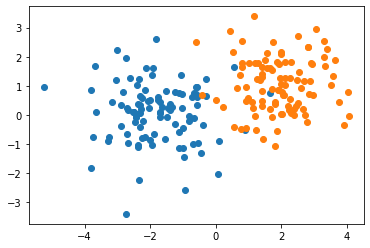

In [17]:
X0 = np.random.multivariate_normal([-2,0], np.identity(2), size=100)
X1 = np.random.multivariate_normal([2,1], np.identity(2), size=100)
plt.plot(*X0.T, 'o')
plt.plot(*X1.T, 'o')
X = np.concatenate([X0, X1], axis=0)
y0 = np.zeros(100)
y1 = np.ones(100)
y = np.concatenate([y0, y1])
I = np.arange(200)
np.random.shuffle(I)
X = X[I, :]
y = y[I]

In [22]:
M = LogisticRegression(solver="lbfgs")
M.fit(X, y)
y_pr = M.predict(X)
acc = accuracy_score(y_pr, y)
acc

0.965

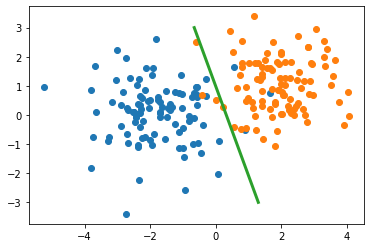

In [29]:
b, c = M.coef_.squeeze() # b, c
a = M.intercept_ # a

plt.plot(*X0.T, 'o')
plt.plot(*X1.T, 'o')
plt.plot([(-a-c*(-3))/b, (-a-c*(3))/b], [-3, 3], lw=3)

$$
a + bx + cy = 0
$$

$$
x = 0, y = -a/c,\qquad y=0, x=-a/b
$$

In [46]:
X0 = np.random.multivariate_normal([0,0], np.identity(2), size=100)
X1a = np.random.multivariate_normal([-4,0], np.identity(2), size=50)
X1b = np.random.multivariate_normal([4,0], np.identity(2), size=50)
X1 = np.concatenate([X1a, X1b], axis=0)
X = np.concatenate([X0, X1], axis=0)
y0 = np.zeros(100)
y1 = np.ones(100)
y = np.concatenate([y0, y1])
I = np.arange(200)
np.random.shuffle(I)
X = X[I, :]
y = y[I]

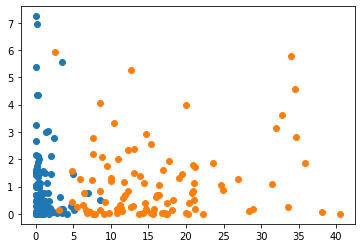

In [49]:
plt.plot(*(X0**2).T, 'o')
plt.plot(*(X1**2).T, 'o')

In [50]:
M = LogisticRegression(solver="lbfgs")
M.fit(X**2, y)
y_pr = M.predict(X**2)
acc = accuracy_score(y_pr, y)
acc

0.97

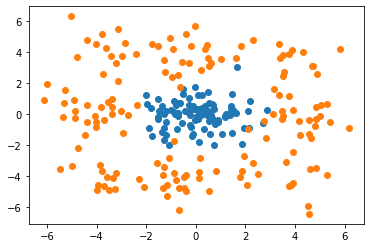

In [65]:
X0 = np.random.multivariate_normal([0,0], np.identity(2), size=100)
X1a = np.random.multivariate_normal([-4,0], np.identity(2), size=25)
X1b = np.random.multivariate_normal([4,0], np.identity(2), size=25)
X1c = np.random.multivariate_normal([0,-4], np.identity(2), size=25)
X1d = np.random.multivariate_normal([0,4], np.identity(2), size=25)
X1e = np.random.multivariate_normal([-4,4], np.identity(2), size=12)
X1f = np.random.multivariate_normal([4,4], np.identity(2), size=13)
X1g = np.random.multivariate_normal([4,-4], np.identity(2), size=12)
X1h = np.random.multivariate_normal([-4,-4], np.identity(2), size=13)

X1 = np.concatenate([X1a, X1b, X1c, X1d, X1e, X1f, X1g, X1h], axis=0)
X = np.concatenate([X0, X1], axis=0)
y0 = np.zeros(100)
y1 = np.ones(100)
y = np.concatenate([y0, y1])
I = np.arange(200)
np.random.shuffle(I)
X = X[I, :]
y = y[I]
plt.plot(*(X0).T, 'o')
plt.plot(*(X1).T, 'o')

In [74]:
P = PolynomialFeatures(degree=2, include_bias=False)
X_poly = P.fit_transform(X) # x0, x1, x0^2, x0*x1, x1^2
M = LogisticRegression()
M.fit(X_poly, y)
y_pr = M.predict(X_poly)
acc = accuracy_score(y_pr, y)
acc

# manual feature engineering

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.965

In [75]:
y_hat = M.predict_proba(X_poly)

In [82]:
np.all((y_hat[:,1] >= 0.5) == y_pr) # yhat = 0.5 <-- line, decision boundary 

True

In [73]:
from sklearn.ensemble import RandomForestClassifier

M = RandomForestClassifier(n_estimators=2)
M.fit(X, y)
y_pr = M.predict(X)
acc = accuracy_score(y_pr, y)
acc

0.97

In [70]:
# deep learning: features learned along with parameters

(200, 2)